In [277]:
# EDA libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

# Split and training libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Model Evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score

# for Saving the model
import pickle

## Importing Dataset 

In [224]:
dataset = pd.read_csv('breast-cancer.csv')

## Data Preprocessing

## Label Encoding the  Diagnosis Column (To 1 and 0)

In [228]:
dataset = dataset.drop(columns = ['id'])  # Drop the id column
le = LabelEncoder() 
dataset.iloc[:, 0] = le.fit_transform(dataset.iloc[:, 0])  # Encode the diagnosis column to 1 and 0 
dataset.head()  # Preview of the dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Feature Selection 

### Correlation Matrix

<Axes: >

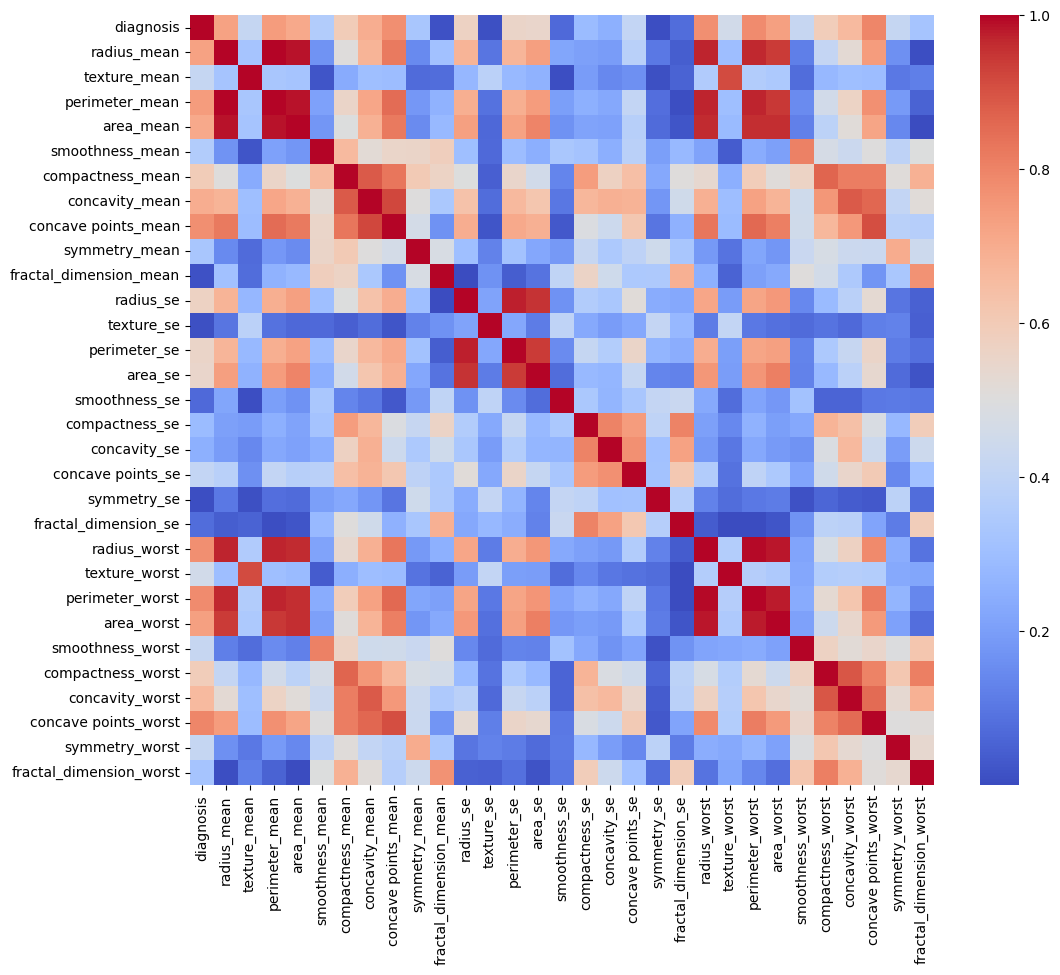

In [232]:
corr = dataset.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = False, cmap='coolwarm')

In [233]:
corr = dataset.corr()['diagnosis'].sort_values(ascending = False)
useful_features = corr[corr > 0.2].index.tolist()  
useful_features.remove('diagnosis')
useful_features = pd.Series(useful_features)
useful_features

0        concave points_worst
1             perimeter_worst
2         concave points_mean
3                radius_worst
4              perimeter_mean
5                  area_worst
6                 radius_mean
7                   area_mean
8              concavity_mean
9             concavity_worst
10           compactness_mean
11          compactness_worst
12                  radius_se
13               perimeter_se
14                    area_se
15              texture_worst
16           smoothness_worst
17             symmetry_worst
18               texture_mean
19          concave points_se
20            smoothness_mean
21              symmetry_mean
22    fractal_dimension_worst
23             compactness_se
24               concavity_se
dtype: object

### Splitting into Features and target

In [250]:
x = dataset[useful_features].values 
y = dataset.iloc[:,0].values
y = y.astype(int)

## Splitting the Dataset into Training and Test Set

In [253]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Feature Scaling 

In [256]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [258]:
model = SVC(kernel = 'rbf')
model.fit(x_train, y_train)

SVC()

In [267]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


## Model Evaluation

In [270]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[70  1]
 [ 2 41]]


0.9736842105263158

Our Model has a 97 % accuracy Score

# Saving the Model

In [280]:
with open('breast_cancer_model.pkl', 'wb') as file:
    pickle.dump(model, file)